<a href="https://colab.research.google.com/github/kunalmahadik/ML-Classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## Business Objective:

*  The objective of this project is to predict which customer might default in coming months. First, let's understand what do we actually mean by Credit Card Default.
* A credit card is a thin rectangular piece of plastic or metal issued by a bank or financial services company, that allows cardholders to borrow funds with which to pay for goods and services with merchants that accept cards for payment.
* Default usually happens after six months in a row of not making at least the minimum payment due, which means the person's credit card is seriously delinquent. During that time the person will be contacted by the creditor and they will want to know what the person is going to do about it. If they are not satisfied with the person's response (or the lack thereof), the account will be closed and after 180 days with no payment, reported as charged off to the credit bureaus.
* The research aims at developing a mechanism to predict the credit card default beforehand and to identify the potential customer base that can be offered various credit instruments so as to invite minimum default.

## Importing essential modules and loading dataset

In [41]:
# Importing modules for EDA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Mounting the drive and importing the dataset

In [1]:
# mounting the google drive for importing the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load the credit default of credit card clients
credit_df = pd.read_excel('/content/drive/MyDrive/Capstone Project 3 - Credit Card Default Prediction/default of credit card clients.xls', header = 1)

## **Understanding more about the data**

##Summary of the data

In [3]:
# Glancing through top 5 rows
credit_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0          0         0       689         0         0         0         0   
1       3261         0      1000      1000      1000         0      2000   
2      15549      1518      1500      1000      1000      1000      5000   
3      29547      2000      2019      1200      1100      1069      1000   
4      19131      2000     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0

In [4]:
# Glancing through bottom 5 rows of the data
credit_df.tail()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
29995  29996     220000    1          3         1   39      0      0      0   
29996  29997     150000    1          3         2   43     -1     -1     -1   
29997  29998      30000    1          2         2   37      4      3      2   
29998  29999      80000    1          3         1   41      1     -1      0   
29999  30000      50000    1          2         1   46      0      0      0   

       PAY_4  PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  \
29995      0      0      0     188948     192815     208365      88004   
29996     -1      0      0       1683       1828       3502       8979   
29997     -1      0      0       3565       3356       2758      20878   
29998      0      0     -1      -1645      78379      76304      52774   
29999      0      0      0      47929      48905      49764      36535   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
29995      31237      15980      8500     20000      5003      3047      5000   
29996       5190          0      1837      3526      8998       129         0   
29997      20582      19357         0         0     22000      4200      2000   
29998      11855      48944     85900      3409      1178      1926     52964   
29999      32428      15313      2078      1800      1430      1000      1000   

       PAY_AMT6  default payment next month  
29995      1000                           0  
29996         0                           0  
29997      3100                           1  
29998      1804                           1  
29999      1000                           1

In [5]:
# Getting the shape of rows and columns
print(f'There are {credit_df.shape[0]} records and {credit_df.shape[1]} features in the dataset')

There are 30000 records and 25 features in the dataset


In [6]:
# Getting all the feature names
print('Features in the dataset:')
credit_df.columns

Features in the dataset:


Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
# Checking the basic information of the dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

There are 30000 entries and 25 features with all 30000 non null values. The datatype of every feature is int64

In [8]:
# Getting the unique value count of each feature
credit_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

There are some features with value counts less than 20 which seems to be categorical features like Sex, Marriage

In [9]:
# Checking the descriptive statistics of the features of the dataset
credit_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

The "default payment next month" is the target variable

### Features Description

**Breakdown of the Features:**

***We have records of 30000 customers. The description of features are as folows:***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

**In our dataset we got customer credit card transaction history for past 6 months, on basis of which we have to predict if customer will default or not.**

## **Data Preparation**

**Why do we need to handle missing values?**
* ***The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first*** 

**Missing values check**

In [10]:
# Checking for count of missing values in each column
print('The count of missing values in each column:')
credit_df.isnull().sum()

The count of missing values in each column:


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

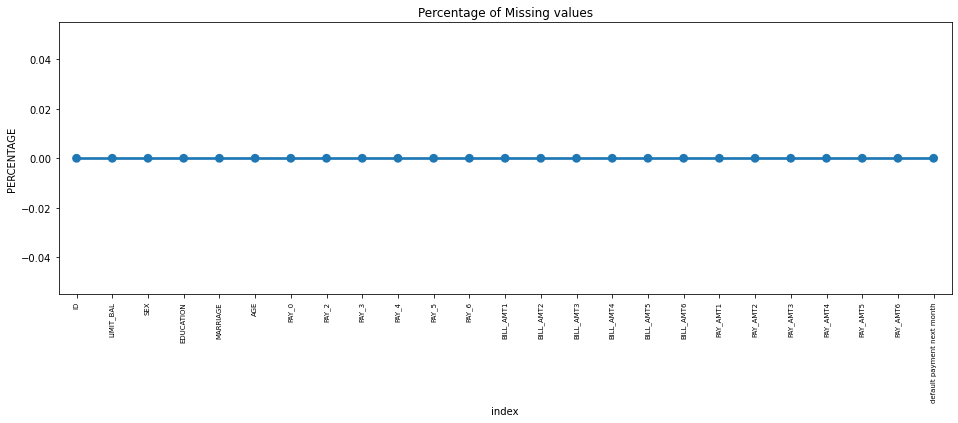

In [11]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((credit_df.isnull().sum())*100/credit_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

**As we can see from above plot there are no missing values in the dataset.**

**Duplicate Values Check**

**Why is it important to remove duplicate records from my data?** 
* ***Duplication just means that there are duplicate records in the dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person***

In [12]:
# Checking the duplicate values
value = len(credit_df[credit_df.duplicated()])
print('The number of duplicate values in the dataset are:', value)

The number of duplicate values in the dataset are: 0


***There are no missing values as well as there are no duplicate records in the dataset***

## **Exploratory Data Analysis**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

**Univariate Analysis**

**Why do you do univariate analysis?**
* ***The key objective of Univariate analysis is to simply describe the data and visualize various features to find patterns within the data.*** 

**Analysis of dependent Variable:**

In [13]:
# renaming for better convenience
credit_df.rename(columns={'default payment next month' : 'default_payment_next_month'}, inplace = True)

In [14]:
# checking the balance of the dpendent variable
credit_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [15]:
# checking the proportion of customers who default payment and will not default payment next month
credit_df['default_payment_next_month'].value_counts(normalize = True)

0    0.7788
1    0.2212
Name: default_payment_next_month, dtype: float64

***About 22% people will default payment next month and remaining won't default***

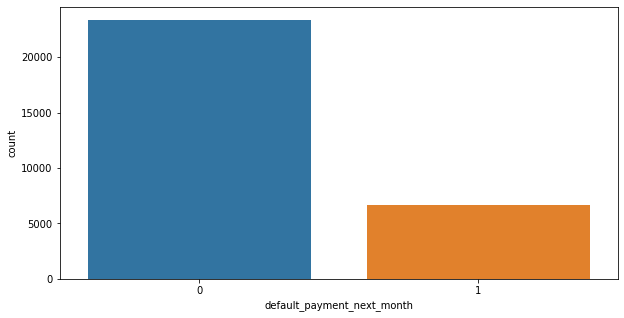

In [16]:
#plotting the count plot to vizualize the data distribution 
plt.figure(figsize=(10,5))
sns.countplot(x = 'default_payment_next_month', data = credit_df)

**From the above data analysis we can say that**
*   **0 - Not Default**
*   **1 - Default**
*   **Defaulters are less than the Non Defaulters in the given dataset.**

***It is evident that the both classes are not in proportion and we have an imbalanced dataset, we need to balance the data.***

**Analysis of Independent Variable:**

***There are few categorical variables in the dataset:***
*   sex
*   education
*   marraige 
*   age

***Categorical variables are qualitative data in which the values are assigned to a set of distinct groups or categories. These groups may consist of alphabetic (e.g., male, female) or numeric labels (e.g., male = 0, female = 1) that do not contain mathematical information beyond the frequency counts related to group membership.***

 ***Let's check how they are related with out target class.***

### **SEX**

* 1 - Male
* 2 - Female

In [17]:
# Counting the number of males and females in the dataset
credit_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

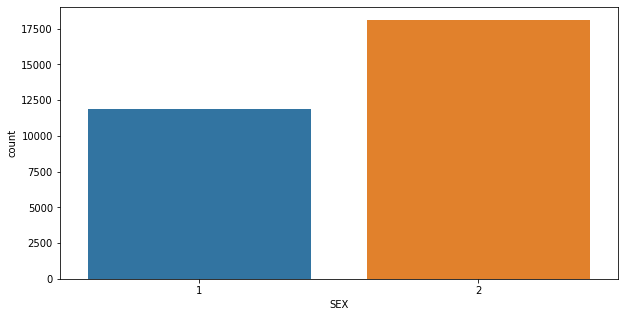

In [18]:
# Plotting the count plot of variable SEX for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'SEX', data = credit_df)

**From the above data analysis we can say that**
*   **1 - Male**
*   **2 - Female**
*   ***Number of Male credit holder is less than Female.***

### **Education**
* **1 - graduate school**
* **2 - University**
* **3 - High school**
* **0,4,5,6 - others**

In [19]:
# Count each category in education feature
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

***Since the categories 0,4,5,6 are lesser in count and they correspond to 'other' section, we will combine those to form a single category named 'other'.***

In [20]:
# Merging 0,4,5,6 to 0 and define 0 as 'others'

credit_df['EDUCATION'] = credit_df['EDUCATION'].replace({4:0, 5:0, 6:0})
credit_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

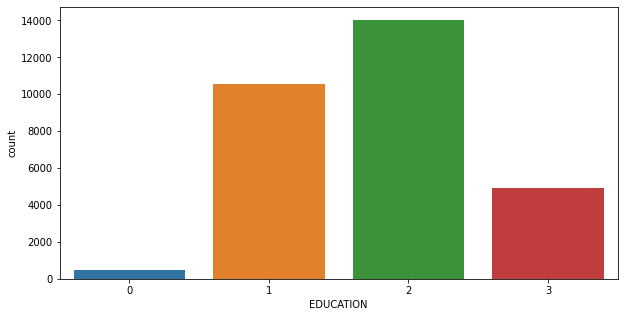

In [21]:
# plotting the count of each category for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'EDUCATION', data = credit_df)

***From the above distribution we can say that***
* More number of credit card holders are university students followed by graduates and high school

### **Marriage**
* 1 - married
* 2 - single
* 0,3 - others

In [22]:
# getting count of each category in marriage feature
credit_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

***Combining 0 and 3 as they are low in count to form a single category as 'others'***

In [23]:
# Combine 0 and 3 by changing the value 0 into others

credit_df['MARRIAGE'] = credit_df['MARRIAGE'].replace({0:3})
credit_df['MARRIAGE'].value_counts(normalize = True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

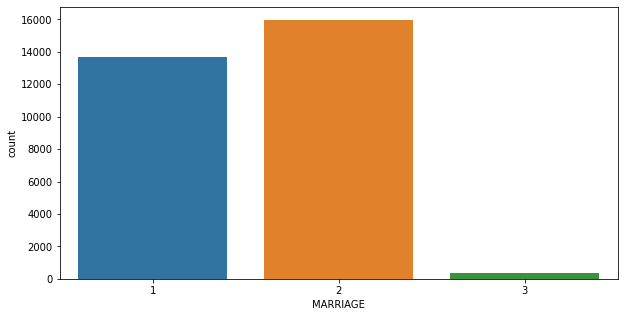

In [24]:
# Plotting the count of each category in Marriage feature for better visualization
plt.figure(figsize = (10,5))
sns.countplot(x = 'MARRIAGE', data = credit_df)

**From the above distribution we can say that**

* **1 - married**
* **2 - single**
* **3 - others**
* ***More number of credit card holders are Single***

### **AGE**

In [25]:
# Getting the count of credit card holders corresponding to age 
credit_df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

In [26]:
#checking the mean of the age group respect to the default_payment_next_month
credit_df.groupby('default_payment_next_month')['AGE'].mean()

default_payment_next_month
0    35.417266
1    35.725738
Name: AGE, dtype: float64

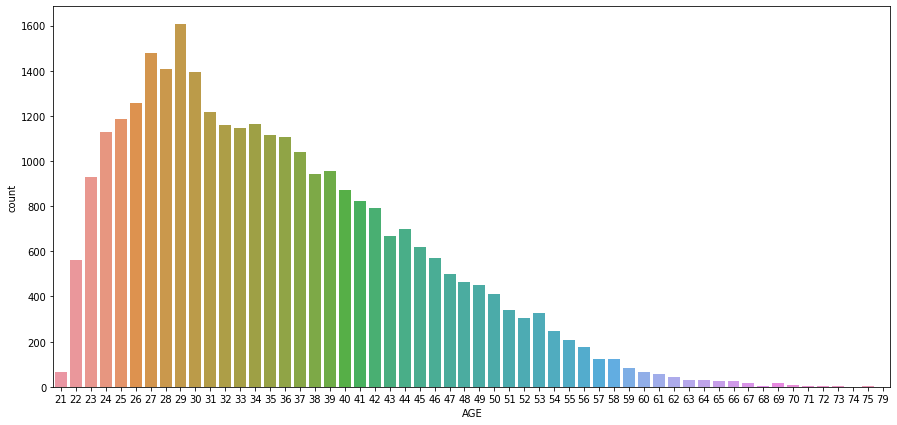

In [27]:
#plotting the count plot to vizualize the data distribution
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = credit_df)
plt.show()

**From the above visualization we can say that**
*  ***We can see more number of credit cards holder age are between 26-30 years old.***
*  ***Age above 60 years old rarely uses the credit card.***

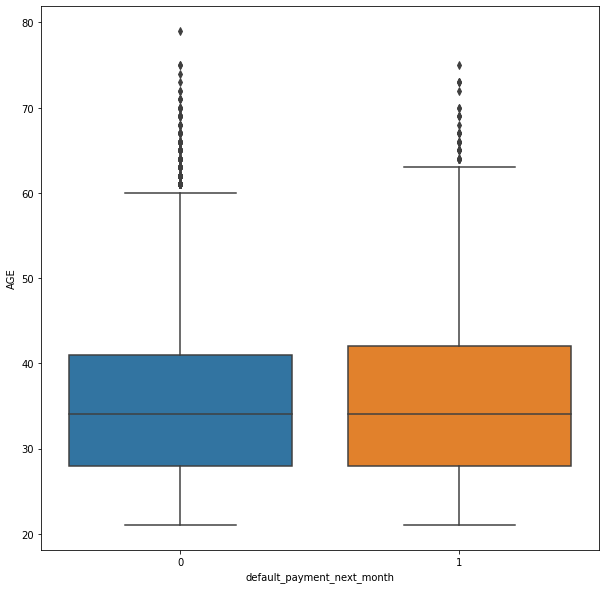

In [28]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="AGE", data=credit_df)

**From the above boxplot we can say that**
* **0 - will not default payment next month**
* **1 - will default payment next month**
* **The middle 50% of the data ranges from about 28 to 42 years of age for both defaulters and non defaulters**
* **There are outliers present in both the classes**

## **Numerical Features**

**What is Numerical Data**

* ***Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.***

### **Limit Balance**

In [29]:
# Checking the descriptive statistics of Limit Balance feature in the dataset
credit_df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

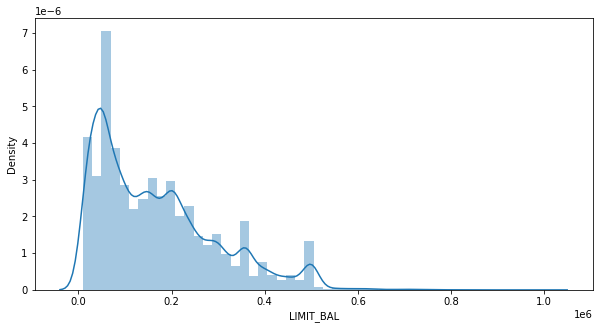

In [30]:
# Plotting the distribution of Limit Balance feature
plt.figure(figsize = (10,5))
sns.distplot(credit_df['LIMIT_BAL'], kde = True)
plt.show()

**From the above distibution we can say that**
* ***Maximum amount of given credit is 50000 NT dollars followed by 30000 and 20000.***

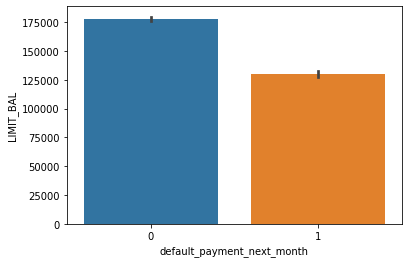

In [35]:
# Plotting the bar plot for better visualization with respect to default payment next month
sns.barplot(x = 'default_payment_next_month', y='LIMIT_BAL', data = credit_df)

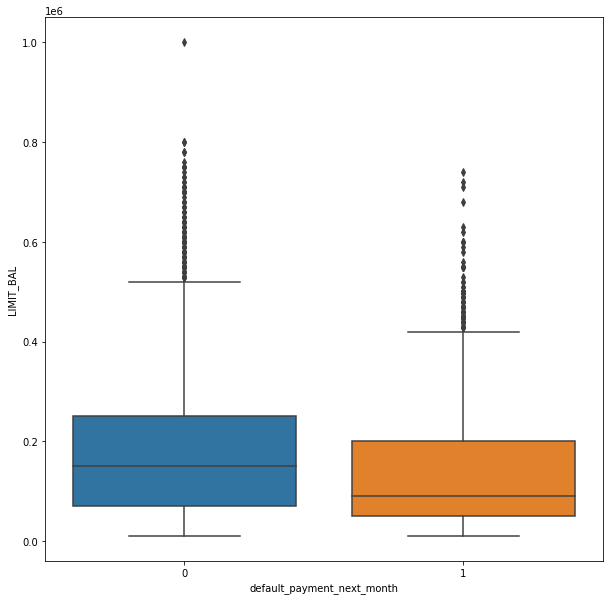

In [36]:
#plotting the box plot to vizualize the data distribution
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="default_payment_next_month", y="LIMIT_BAL", data=credit_df)